<a href="https://colab.research.google.com/github/abhashjain9/EDA-Hotel-Booking-Analysis/blob/main/ID_final_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **First Import necessary packages and import the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
# Importing datetime modules
from datetime import datetime
from datetime import date

# **Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Now import and check info of the dataset

In [ ]:
# Read to CSV
file_path='/content/drive/MyDrive/AlmaBetter/capstone project/EDA/capstone project-1/Hotel Booking Analysis/Hotel Bookings.csv'
data=pd.read_csv(file_path)

In [ ]:
#Checking the info of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Data Preprocessing**

In [ ]:
#Copy the dataset
df = data.copy()

In [ ]:
df.shape

(119390, 32)

## **Data cleaning**

In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

                    We have company,agent,country and children with missing values

In [ ]:
# no id for agent,null for company and or missing values for children are just replace it with 0
df[['agent','company','children']] = df[['agent','company','children']].fillna(0.0)
'''
Columns like children, company, and agent, that are float type but their values are in integers
'''
# convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
# For the missing values in the country column, replace it with NA (value that appears most often)
df['country'].fillna('NA', inplace=True)

In [ ]:
#In this data set many rows that have no guests includs adults, children and babies and this data rows does not make any impact on analysis
df[(df.adults+df.children+df.babies)==0].shape

(180, 32)

180 such rows that have no guests including adults, children and babies so, droping those rows

In [ ]:
# Remove rows that have no adult, baby and children
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

# ***Exploratory Data Analysis(EDA)***
extracting the information from our data

# **BOOKING WISE ANALYSIS**

# 1. How many booking cancelled each year ?

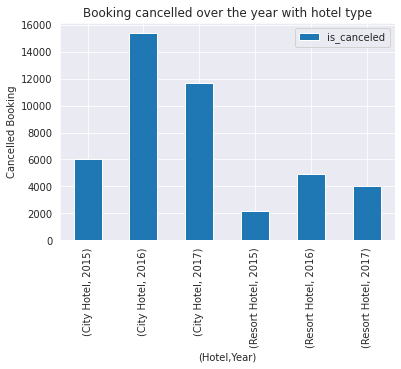

In [ ]:
# Calculating how many booking cancelled each year
df_cancelled=df.groupby(['hotel','arrival_date_year'])['is_canceled'].sum()
#Set plotting style
sns.set_style('darkgrid')
#plot the bar chart
df_cancelled.plot.bar()
# set x label
plt.xlabel("(Hotel,Year)")
# set y label
plt.ylabel("Cancelled Booking")
# set legend
plt.legend(loc=1)
# set curve title
plt.title("Booking cancelled over the year with hotel type")
# Show the plot
plt.show()

In [ ]:
df_cancelled

hotel         arrival_date_year
City Hotel    2015                  6003
              2016                 15396
              2017                 11680
Resort Hotel  2015                  2138
              2016                  4928
              2017                  4054
Name: is_canceled, dtype: int64

**INFERENCES**

Total bookings got canceled 44199 i.e. 37% of total booking. Most of the booking cancelled for City Hotel during the year of 2016 and 2017 that is 61% of total booking canceled .

**For further analysis,We will consider only those bookings which did not  canceled**

In [ ]:
not_canceled_df = df[df['is_canceled'] == 0]

# 2. What is the booking ratio between weekend and week days nights by hotel?




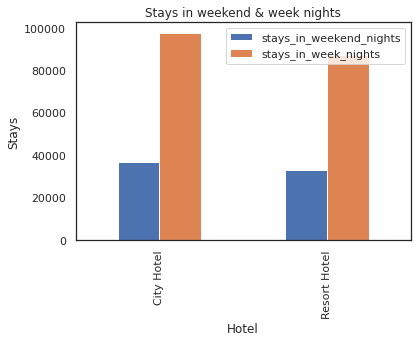

<Figure size 720x576 with 0 Axes>

In [ ]:
#Creating datafram for interested colume
stay_df=not_canceled_df[['hotel','stays_in_weekend_nights','stays_in_week_nights']]
#Groupby weekend and week days nights by hotel
stay_df=stay_df.groupby('hotel')[['stays_in_weekend_nights','stays_in_week_nights']].sum()
#set seaborn plotting aesthetics
sns.set(style='white')
#plot the bar chart
stay_df.plot.bar()
# set x label
plt.xlabel("Hotel")
# set y label
plt.ylabel("Stays")
# set legend
plt.legend(loc=1)
# set title of chart
plt.title("Stays in weekend & week nights")
#set fig. size
plt.figure(figsize =(10,8))
#show curve
plt.show()

In [ ]:
stay_df

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,36817,97651
Resort Hotel,32798,87026


**INFERENCES**

Total guest stays in week nights are 184677 in that 97651 stays in City hotel and 87026 stays in resort hotel.
Total guest stays in weekend nights are 184677 in that 36817 stays in City hotel and 32798 stays in resort hotel.

# **3**.What is the booking percentage between city hotel and resort hotel?

In [ ]:
#find the booking percentage between hotel type
hotel_booking=not_canceled_df['hotel'].value_counts().reset_index()
hotel_booking

,index,hotel
0,City Hotel,46084
1,Resort Hotel,28927


In [ ]:
#plot the pie chart
fig = px.pie(hotel_booking, values='hotel', names='index', title='Booking between Resort and City Hotel')
#show the plot
plt.rcParams['figure.figsize']=5,5
fig.show()

**INFERENCES**

More than 60% of the population booked the City hotel

# 4. What is the percentage of booking every year?

In [ ]:
#Calculate number of booking per year
hotel_booking_year=df['arrival_date_year'].value_counts().sort_index().reset_index()
hotel_booking_year

,index,arrival_date_year
0,2015,21996
1,2016,56707
2,2017,40687


In [ ]:
# plot pie chart for percentage of booking every year
fig = px.pie(hotel_booking_year, values='arrival_date_year', names='index', title='Percentage of booking every year')
#show the pie chart
fig.show()

**INFERENCES**

More bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 14% the next year.

# 5.Which is the most booking market segment for hotel?

In [ ]:
# create small datafram of intrested data
market_segment=not_canceled_df['market_segment']
#value count of booking according to market segment
market_segment=market_segment.value_counts().reset_index()
#plot the pie chart
fig = px.pie(market_segment, values='market_segment', names='index', title='Market Segment')
fig.show()

**INFERENCES**

As we can see from analysis most bookings were made by online TA market segment. And the least bookings were made by aviation and complementary market segment.

# 6:Which hotel makes more revenue?

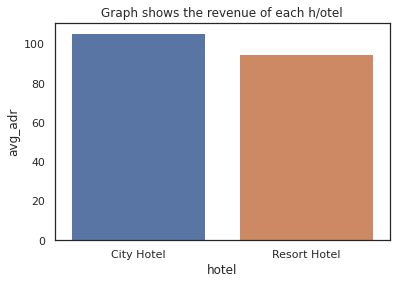

In [ ]:
# Grouping the hotels
group_by_hotel=df.groupby('hotel')
# Resetting index and renaming the column
df1=group_by_hotel['adr'].agg(np.mean).reset_index().rename(columns={'adr':'avg_adr'})
# plot the bar chart
sns.barplot(data=df1,x='hotel',y='avg_adr').set_title('Graph shows the revenue of each h/otel')
# show the plot
plt.show()

**INFERENCES**

city hotel has slightly more revenue than Resort hotel

# **GUEST WISE ANALYSIS**

# 1.Top 10 countries most of the gusets come from?

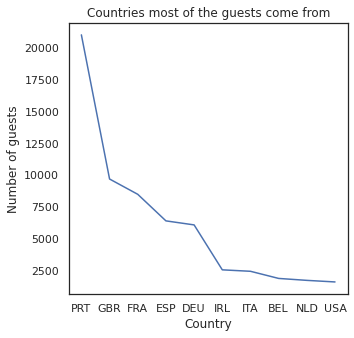

In [ ]:
# find top 10 country from most of the gusets come
gust_df=not_canceled_df['country'].value_counts().reset_index().head(10)
#set seaborn plotting aesthetics
sns.set(style='white')
#create grouped bar chart
sns.lineplot(x='index', y='country', data=gust_df)
# set x label
plt.xlabel("Country")
# set y label
plt.ylabel("Number of guests")
# set title
plt.title("Countries most of the guests come from")
# show the plot
plt.show()

**INFERENCES**

PRT, GBR and FRA, ESP and DEU are the top countries from most guests come, approx 70% come from these 5 countries.

In [ ]:
not_canceled_df['country'].value_counts().sum()

75011

# 2.What are the number of wrong room assigned to gusets with respect  to booked room type by each hotel?

In [ ]:
def check_assignment(str1,str2):
  '''
  This function check reserved room assigened correct or wrong
  '''
  if str1==str2: # check the condition
    value=0
  else:
    value=1
  return value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



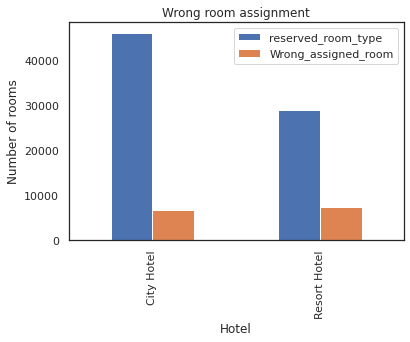

In [ ]:
# create small datafram of intesed columes
assignment_df=not_canceled_df[['hotel','reserved_room_type','assigned_room_type']]
# apply check_assignment function
assignment_df['Wrong_assigned_room']=assignment_df.apply(lambda x:check_assignment(x['reserved_room_type'],x['assigned_room_type']),axis=1)
#group by hotel with room assigned
assignment_df.groupby('hotel').agg({'reserved_room_type':'count','Wrong_assigned_room':'sum'}).plot.bar()
# set x label
plt.xlabel("Hotel")
# set y label
plt.ylabel("Number of rooms")
# set legend
plt.legend(loc=1)
# set title
plt.title("Wrong room assignment")
# show the plot
plt.show()

In [ ]:
assignment_df.groupby('hotel').agg({'reserved_room_type':'count','Wrong_assigned_room':'sum'})

,reserved_room_type,Wrong_assigned_room
hotel,,
City Hotel,46084,6661
Resort Hotel,28927,7334


**INFERENCES**

In resort hotel 7334 room assigned wrong i.e 25.4% of total reserved room type in resort hotel.
In city hotel 6661 room assigned wrong i.e 14.5% of total reserved room type in city hotel.


# 3.Is there any repeated guest?

In [ ]:
# Taking only those rows which were not cancelled
data_not_canceled=data[data['is_canceled']==0]
data_not_canceled.groupby('arrival_date_year')['is_repeated_guest'].value_counts()

arrival_date_year  is_repeated_guest
2015               0                    13565
                   1                      289
2016               0                    34727
                   1                     1643
2017               0                    23616
                   1                     1326
Name: is_repeated_guest, dtype: int64

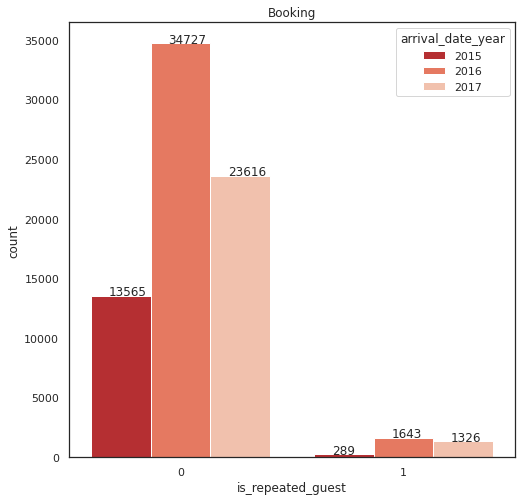

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='is_repeated_guest',data=data_not_canceled,hue='arrival_date_year',palette='Reds_r')

for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.08, p.get_height()+0.01))
plt.title('Booking')
plt.show()

**INFERENCE**

 The 280 guests were repeated in the year 2015 , 1643 guests were repeated in the year 2016 and 1326 guests were repeated in the year 2017.

# **TYPE OF VISITORS**

# 1. Most booked accommodation type like as adults,children and babies?

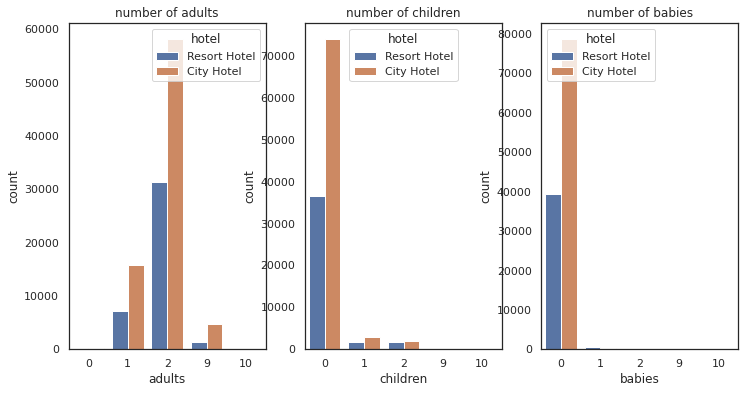

In [ ]:
# Count plot for adult,children and babies in a row
fig,axes=plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(12,6))
# setting x_axis and title for adults
sns.countplot(ax=axes[0],data=df,x='adults',hue='hotel').set_title('number of adults')
# setting x_axis and title for children
sns.countplot(ax=axes[1],data=df,x='children',hue='hotel').set_title('number of children')
# setting x_axis and title for babies
sns.countplot(ax=axes[2],data=df,x='babies',hue='hotel').set_title('number of babies')
# show the plot
plt.show()

**INFERENCES**

Majority of visitors travel with pairs.very few with children and babies.visotors with babies prefer mostly the resort hotel.

# 2.From which country visitors come the most? 

In [ ]:
# Finding top 10 countires with number of visitors from each one of them.
top_10_countries_visitors=data['country'].value_counts()[:10]
print(top_10_countries_visitors)
num_of_visitors=top_10_countries_visitors
top_10_countries=top_10_countries_visitors.index

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


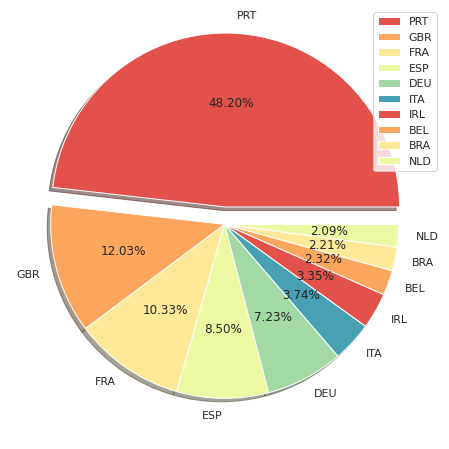

In [ ]:
# Plotting pie chart
my_explode=[0]*10
my_explode[0]=0.1  # Exploding the first segment which is the country that has most number of visitors
plt.figure(figsize=(8,8))

colors=sns.color_palette('Spectral')
plt.pie(num_of_visitors,explode=my_explode,labels=top_10_countries,colors=colors,autopct='%1.2f%%',shadow=True)
plt.legend()
plt.show()

**Inference**  

PRT,GBR and FRA,ESP and DEU are the top countries from most guests come from,approx 70% comes from these 5 countries

# **MONTH WISE ANALYSIS**

# Which is the most occupied month for hotels?

In [ ]:
ind=['January','February','March','April', 'May','June','July','August','September','October',
     'November', 'December']
hotel_monthly_bookings=data_not_canceled['arrival_date_month'].value_counts().reindex(ind)
print(hotel_monthly_bookings)
hotel_bookings=hotel_monthly_bookings.values
months=hotel_monthly_bookings.index

January      4122
February     5372
March        6645
April        6565
May          7114
June         6404
July         7919
August       8638
September    6392
October      6914
November     4672
December     4409
Name: arrival_date_month, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



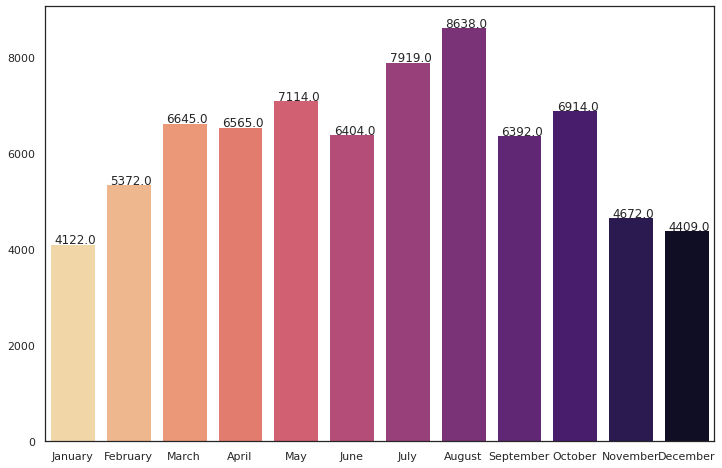

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.barplot(months,hotel_bookings,palette='magma_r')

for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.08, p.get_height()+0.01))
plt.show()

**INFERENCES**

As we can see from  analysis most bookings were made from July to August. And the least bookings were made at the start and end of the year.

# **ROOM WISE ANALYSIS**

# Which room type have the most demand and which room type generates highest **`adr`**?

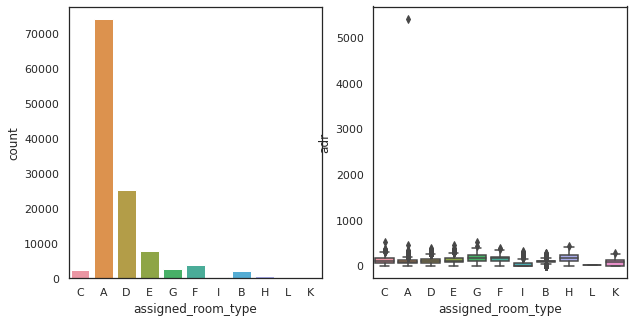

In [ ]:
df1=pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'}).sort_values(by='num_of_bookings',ascending=False)
df1.drop(df1[df1['agent']==0].index,inplace=True)
df1=df1[:10]
fig,axes=plt.subplots(1,2,figsize=(10,5))
room=df.groupby('assigned_room_type')
df1['num_of_bookings']=room.size()
sns.countplot(ax=axes[0],x=df['assigned_room_type'])
sns.boxplot(ax=axes[1],x=df['assigned_room_type'],y=df['adr'])
plt.show()

**INFERENCES**

Room type 'A' have the most demand and the adr is also high.

# **Conclusion:**

We first decided to take up this project solely due to our mutual interest in hotel booking.Then we decided first work individually gaining insights doing some eda etc.we started to form the questions and we discussed with team member.After doing some random EDAs.we gained some confidence.

We used the give dataset that contains data about hotel bookings between 2015-2017 like booking canelled,booking chanels,booking date etc.
We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.

BOOKING WISE ANALYSIS
1.   How many booking cancelled each year ?
2.   What is the booking ratio between weekend and week days nights by hotel?
3.  What is the booking percentage between city hotel and resort hotel?
 
4. What is the percentage of booking every year?  
5.  Which is the most booking market segment for hotel?   

6. Which hotel makes more revenue?

GUEST WISE ANALYSIS

1. Top 10 countries from most of the gusets come?

2. What are the number of wrong room assigned to gusets with respect  to booked room type by each hotel?

3. Is repeated guest

TYPE OF VISITORS

 1. Most booked accommodation type like as adults,children and babies.

 2. From which country visitors comes the most?

MONTH WISE ANALYSIS

 1. Which is the most occupied month for hotels?

ROOM WISE ANALYSIS
1. Which room type have the most demand and which room type generates highest adr?









**SUMMARY**

BOOKING WISE ANALYSIS
1.   Total bookings got canceled 44199 i.e. 37% of total booking. Most of the booking cancelled for City Hotel during the year of 2016 and 2017 that is 61% of total booking canceled.
2.   Tolal bookings got canceled 44199 i.e. 37% of total booking. Most of the booking cancelled for City Hotel during the year of 2016 and 2017 that is 61% of total booking canceled 
3. More than 60% of the population booked the City hotel
4. More bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 14% the next year.
5. As we can see from analysis most bookings were made by online TA market segment. And the least bookings were made by aviation and complementary market segment.
6. city hotel has slightly more revenue than Resort hotel

GUEST WISE ANALYSIS
1.   PRT, GBR and FRA, ESP and DEU are the top countries from most guests come, approx 70% come from these 5 countries.
2. In resort hotel 7334 room assigned wrong i.e 25.4% of total reserved room type in resort hotel. In city hotel 6661 room assigned wrong i.e 14.5% of total reserved room type in city hotel.
3. The 280 guests were repeated in the year 2015 , 1643 guests were repeated in the year 2016 and 1326 guests were repeated in the year 2017.

TYPE OF VISITORS
1. Majority of visitors travel with family.visotors with babies prefer mostly the resort hotel
2. PRT,GBR and FRA,ESP and DEU are the top countries from most guests come from,approx 70% comes from these 5 countries.
MONTH WISE ANALYSIS
1. As we can see from analysis most bookings were made from July to August. And the least bookings were made at the start and end of the year.

ROOM WISE ANALYSIS
1. Room type 'A' have the most demand and the adr is also high.